# Ingeniería de Caracteres
## Estudiantes:
### Carlos Cerro
### Daniel Pinto


Lo primero que vamos a realizar, es a traer la base de datos de las carcterísticas de los jugadores. Nos conectaremos a la bd que se encuentra guardada en Google Drive y de ahí obtendremos los datos

In [0]:
#Librerias importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import sqlite3
import scipy.stats as ss


In [0]:
#Obtenemos acceso a google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Ruta para obtener los datos
ruta = '/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/'
bd = ruta +'database.sqlite'

In [0]:
conn = sqlite3.connect(bd)

In [0]:
data = pd.read_sql("""SELECT *
                              FROM Player_Attributes;""", conn)

In [0]:
d = data.dtypes

In [0]:
print(d.to_latex(index = True))

\begin{tabular}{ll}
\toprule
{} &        0 \\
\midrule
id                  &    int64 \\
player\_fifa\_api\_id  &    int64 \\
player\_api\_id       &    int64 \\
date                &   object \\
overall\_rating      &  float64 \\
potential           &  float64 \\
preferred\_foot      &   object \\
attacking\_work\_rate &   object \\
defensive\_work\_rate &   object \\
crossing            &  float64 \\
finishing           &  float64 \\
heading\_accuracy    &  float64 \\
short\_passing       &  float64 \\
volleys             &  float64 \\
dribbling           &  float64 \\
curve               &  float64 \\
free\_kick\_accuracy  &  float64 \\
long\_passing        &  float64 \\
ball\_control        &  float64 \\
acceleration        &  float64 \\
sprint\_speed        &  float64 \\
agility             &  float64 \\
reactions           &  float64 \\
balance             &  float64 \\
shot\_power          &  float64 \\
jumping             &  float64 \\
stamina             &  float64 \\
strength

## Limpieza de la base de datos
En esta sección haremos la limpieza de los datos y su tratamiento adecuado para poder realizar la ingeniería de característica 

In [0]:
#Eliminar filas con datos nulos
data = data.dropna() 

In [0]:
newdata = data.drop(["id","player_fifa_api_id","player_api_id","date"],axis = 1)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [0]:
newdata.duplicated()
newdata = newdata.drop_duplicates()
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [0]:
# modo alternativo de binarizar en pandas: newdata["preferred_foot_bin"] = newdata["preferred_foot"].apply(lambda val: 1 if val == "right" else 0)
#Binarizamos la variable resultado, que en nuestro caso es si el pie preferido
#del jugador es el izquierdo o el derecho
enc = LabelEncoder()
newdata["preferred_foot_bin"] = enc.fit_transform(newdata["preferred_foot"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# Eliminar filas en las que los valores de attacking_work_rate o defensive_work_rate son diferentes de low, medium o high.
newdata = newdata.drop(newdata[(newdata.attacking_work_rate != "low") & (newdata.attacking_work_rate != "medium") & (newdata.attacking_work_rate != "high")].index)
newdata = newdata.drop(newdata[(newdata.defensive_work_rate != "low") & (newdata.defensive_work_rate != "medium") & (newdata.defensive_work_rate != "high")].index)
newdata

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot_bin
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,1
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,1
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,1
5,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,40.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,62.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
6,74.0,76.0,left,high,medium,80.0,53.0,58.0,71.0,32.0,73.0,70.0,69.0,68.0,71.0,79.0,78.0,78.0,67.0,90.0,71.0,85.0,79.0,56.0,60.0,68.0,67.0,60.0,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,84.0,86.0,78.0,84.0,85.0,66.0,72.0,77.0,86.0,73.0,76.0,58.0,72.0,67.0,81.0,56.0,78.0,86.0,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0,1
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,61.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,85.0,86.0,74.0,73.0,86.0,66.0,67.0,77.0,74.0,73.0,75.0,58.0,66.0,65.0,73.0,67.0,64.0,72.0,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0,1
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,87.0,86.0,73.0,73.0,91.0,61.0,60.0,77.0,69.0,73.0,72.0,58.0,67.0,59.0,78.0,63.0,63.0,68.0,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0,1


In [0]:
#Procedemos a dummizar las variables attacking_work_rate y defensive_work_rate
#Hay un problema al dummizar las variables, quedan repetidas las columnas low, medium y high dos veces.
newcols = pd.get_dummies(newdata["attacking_work_rate"])
newcols1 = pd.get_dummies(newdata["defensive_work_rate"])
newcols.rename(columns={'low':'low_attacking','medium':'medium_attacking','high':'high_attacking'}, inplace=True)
newcols = newcols.reset_index(drop=True)
newcols1 = newcols1.reset_index(drop = True)

#Luego obtenemos procedemos a separar las variables númericas en X_num
#y también separamos la variable resultado en la variable "Y"
X_num = newdata.drop(["preferred_foot", "attacking_work_rate", "defensive_work_rate","preferred_foot_bin"], axis = 1)
Y = newdata[["preferred_foot_bin"]]
Y = Y.reset_index(drop = True)

#Normalizamos las variables numericas X_num
from sklearn import preprocessing
x = X_num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled, columns=X_num.columns)

#Por último añadimos las variables dummizadas a la bd númerica normalizad 
X = pd.concat([X_norm, newcols, newcols1], axis=1)
X

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,high_attacking,low_attacking,medium_attacking,high,low,medium
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.726316,0.462366,0.552083,0.489362,0.688172,0.723404,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.617021,0.467391,0.520833,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.421053,0.462366,0.552083,0.489362,0.688172,0.691489,0.720430,0.053763,0.108696,0.093750,0.073684,0.073684,0,0,1,0,0,1
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.606383,0.456522,0.510417,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.410526,0.451613,0.541667,0.478723,0.655914,0.659574,0.688172,0.043011,0.097826,0.083333,0.063158,0.063158,0,0,1,0,0,1
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.423913,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.723404,0.336957,0.750000,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.694737,0.623656,0.677083,0.606383,0.806452,0.787234,0.817204,0.139785,0.065217,0.083333,0.084211,0.115789,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.914894,0.826087,0.864583,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.810526,0.903226,0.906250,0.861702,0.225806,0.319149,0.301075,0.086022,0.206522,0.864583,0.200000,0.200000,0,0,1,0,1,0
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.861702,0.826087,0.875000,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.663158,0.752688,0.906250,0.723404,0.333333,0.319149,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.882979,0.826087,0.895833,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.652632,0.709677,0.906250,0.542553,0.290323,0.329787,0.301075,0.086022,0.206522,0.750000,0.200000,0.200000,0,0,1,0,1,0


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Relaciones entre variables
En esta sección pretendemos realizar los correlogramas de nuestras variables normalizadas. Se utilizarán los métodos de Pearson, Kendall y Spearman. Luego haremos un cross tab de nuestras dos variables categoricas para conocer la relación entre estás dos. Por último realizaremos la entropía de Shannon para determinar que tanta información se obtiene con cada una de las variables

## Tabulaciones cruzadas

In [0]:
print(pd.crosstab(newdata.attacking_work_rate, newdata.defensive_work_rate))

defensive_work_rate   high   low  medium
attacking_work_rate                     
high                  6401  4236   22105
low                   2605   544    3533
medium               12289  8947   72256


In [0]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [0]:
cramers_v(newdata.attacking_work_rate, newdata.defensive_work_rate)

0.12203009638247342

## Correlogramas

In [0]:
#Crear la matriz de correlaciones con cada uno de los métodos mencionados
corr_pearson = X_norm.corr(method='pearson')
corr_kendall = X_norm.corr(method='kendall')
corr_spearman = X_norm.corr(method='spearman')

In [0]:
#corr_spearman.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/spearman.xlsx')
#corr_kendall.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/kendall.xlsx')
#corr_pearson.to_excel('/content/drive/My Drive/Maestría en ciencia de los datos y análitica/Aprendizaje Automatico/pearson.xlsx')

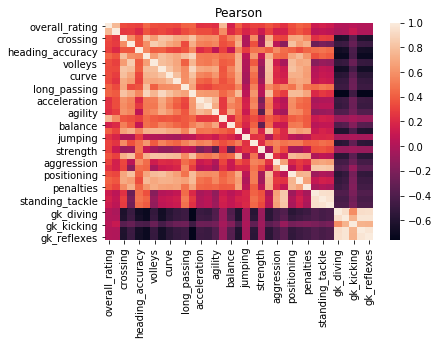

In [0]:
#Observemos primero el correlograma de pearson
ax = plt.axes()
sns.heatmap(corr_pearson)
ax.set_title('Pearson')
plt.show()

Por el correlograma de pearson anterior, podemos observar que las variables de habilidades en el arco, están muy correlacionadas entre ellas, por lo tanto proponemos generar una variable indicador con el promedio de estás y de esta manera dejar un "overall_gk" que me resuma las habilidades en el arco

In [0]:
X['overall_gk']=X.loc[:,['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].mean(axis=1)
#Por lo tanto ya no es necesario tener el resto de variables
X.drop(['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes'], axis=1, inplace= True)

A continuación observamos los correlogramas de Kendall y Spearman, con ellos tomamos las decisiones sobre las variables nominales que vamos a utilizar

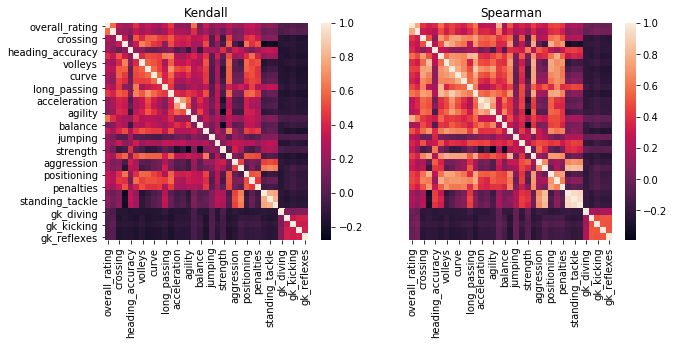

In [0]:
#Graficamos los correlogramas de Kendall y Spearman
fig = plt.figure(figsize = (10,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


sns.heatmap(data=corr_kendall, ax=ax1)
sns.heatmap(data=corr_spearman, ax=ax2, yticklabels=False)

ax1.set_title('Kendall')
ax2.set_title('Spearman')
plt.show()

La variable "marking" esta muy correlacionada (con los métodos de Kendall, Spearman y Pearson) con "standing_tackle", "sliding_tackle" y con "interceptions". Por lo tanto utilizando la variable "marking" estaríamos utilizando información de este resto de variables

Ahora observando habilidades un poco más técnicas de los jugadores, la variable "ball_control" tiene una relación alta con "short_passing" y "driblling", lo que nos indica que "ball_control" puede explicar estas dos variables.

In [0]:
#Procedemos a prescindir de las variables "standing tackle", "sliding_tackle",
# "interceptions", "driblling" y "short_passing"
X.drop(["standing_tackle", "sliding_tackle", 
        "interceptions", "dribbling" ,"short_passing"], axis=1, inplace= True)


In [0]:
X

,overall_rating,potential,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,positioning,vision,penalties,marking,high_attacking,low_attacking,medium_attacking,high,low,medium,overall_gk
0,0.557377,0.551724,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.714286,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716
1,0.475410,0.465517,0.510638,0.447917,0.721649,0.467391,0.467391,0.395833,0.648936,0.478261,0.559524,0.611765,0.564706,0.379747,0.630952,0.557895,0.536585,0.511628,0.767442,0.357895,0.626374,0.462366,0.552083,0.489362,0.688172,0,0,1,0,0,1,0.080716
2,0.459016,0.448276,0.500000,0.437500,0.711340,0.456522,0.456522,0.385417,0.638298,0.467391,0.559524,0.611765,0.564706,0.367089,0.630952,0.547368,0.536585,0.511628,0.767442,0.347368,0.615385,0.451613,0.541667,0.478723,0.655914,0,0,1,0,0,1,0.070097
3,0.672131,0.637931,0.840426,0.541667,0.587629,0.423913,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.642105,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667
4,0.672131,0.637931,0.840426,0.541667,0.587629,0.336957,0.739130,0.708333,0.691489,0.717391,0.785714,0.776471,0.788235,0.632911,0.928571,0.726316,0.865854,0.802326,0.534884,0.621053,0.681319,0.623656,0.677083,0.606383,0.806452,1,0,0,0,0,1,0.097667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132911,0.819672,0.793103,0.882979,0.791667,0.597938,0.826087,0.913043,0.802083,0.861702,0.869565,0.630952,0.705882,0.776471,0.873418,0.726190,0.778947,0.536585,0.720930,0.662791,0.842105,0.549451,0.903226,0.906250,0.861702,0.225806,0,0,1,0,1,0,0.311425
132912,0.737705,0.706897,0.776596,0.781250,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.604396,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509
132913,0.721311,0.706897,0.776596,0.729167,0.536082,0.826087,0.913043,0.760417,0.744681,0.880435,0.630952,0.647059,0.776471,0.721519,0.726190,0.768421,0.536585,0.651163,0.639535,0.757895,0.670330,0.752688,0.906250,0.723404,0.333333,0,0,1,0,1,0,0.288509
132914,0.737705,0.724138,0.776596,0.656250,0.577320,0.826087,0.913043,0.750000,0.744681,0.934783,0.571429,0.564706,0.776471,0.658228,0.726190,0.736842,0.536585,0.662791,0.569767,0.810526,0.626374,0.709677,0.906250,0.542553,0.290323,0,0,1,0,1,0,0.288509


Por último, pretendemos a realizar la correlación de punto biserial, que ayuda a determinar la relación entre una variable binaria y una variable númerica

In [0]:
#Lista de númericas
x_num_names = X.columns.to_list()
x_num_names.remove('high_attacking')
x_num_names.remove('low_attacking')
x_num_names.remove('medium_attacking')
x_num_names.remove('high'),
x_num_names.remove('low')
x_num_names.remove('medium')
#Lista de dicotomicas
x_dic_names = ['high_attacking',
 'low_attacking',
 'medium_attacking',
 'high',
 'low',
 'medium']

In [0]:
iterables = ['high_attacking','low_attacking', 'medium_attacking', 'high','low','medium']
df = pd.DataFrame('-', iterables, x_num_names)

In [0]:
from scipy.stats import pointbiserialr
for i in x_num_names:
  for j in x_dic_names:
    df.loc[j,i] =pointbiserialr(X.loc[:,i], X.loc[:,j]).correlation

In [0]:
df.dtypes

overall_rating        object
potential             object
crossing              object
finishing             object
heading_accuracy      object
volleys               object
curve                 object
free_kick_accuracy    object
long_passing          object
ball_control          object
acceleration          object
sprint_speed          object
agility               object
reactions             object
balance               object
shot_power            object
jumping               object
stamina               object
strength              object
long_shots            object
aggression            object
positioning           object
vision                object
penalties             object
marking               object
overall_gk            object
dtype: object

In [0]:
df.iloc[:,0:33]

,overall_rating,potential,crossing,finishing,heading_accuracy,volleys,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,positioning,vision,penalties,marking,overall_gk
high_attacking,0.147504,0.141787,0.292133,0.288294,0.0901237,0.273181,0.281251,0.21066,0.132927,0.272591,0.338673,0.3386,0.317523,0.171003,0.222671,0.2508,0.0573116,0.274229,-0.0574528,0.271272,0.0703654,0.308789,0.221172,0.204852,-0.0394453,-0.175087
low_attacking,0.0052649,-0.0367727,-0.0903032,-0.139519,0.1349,-0.113022,-0.116077,-0.0813118,-0.000579837,-0.0529906,-0.136405,-0.125311,-0.1675,-0.033425,-0.0843888,-0.0493306,0.0387071,-0.0267009,0.150425,-0.101091,0.137099,-0.1269,-0.0817758,-0.0611408,0.187456,-0.0592898
medium_attacking,-0.141663,-0.11616,-0.232378,-0.205212,-0.14955,-0.203632,-0.209783,-0.159823,-0.125116,-0.231793,-0.254226,-0.259464,-0.219399,-0.145322,-0.169682,-0.212988,-0.0725804,-0.245914,-0.0177637,-0.207539,-0.131963,-0.230582,-0.169518,-0.163994,-0.0524654,0.193528
high,0.127669,0.0673539,0.0570531,-0.0286574,0.194484,0.00963084,0.00176657,0.0212658,0.168652,0.0873292,-0.00643294,0.00728066,-0.0290191,0.121741,0.0349112,0.0977986,0.146116,0.244238,0.201498,0.0525818,0.316149,0.0217168,0.0826827,0.0221186,0.295927,-0.123346
low,0.0610024,0.0560027,0.113744,0.290313,0.0382886,0.260625,0.197192,0.168694,-0.0095003,0.178606,0.158705,0.144592,0.172885,0.0520333,0.086849,0.171396,-0.0676933,-0.0498461,-0.0847758,0.204039,-0.151911,0.220578,0.141936,0.214866,-0.269727,-0.0921641
medium,-0.148445,-0.0947695,-0.12608,-0.176689,-0.188387,-0.188061,-0.137693,-0.134242,-0.133866,-0.196097,-0.104278,-0.105948,-0.0952678,-0.137313,-0.0890649,-0.199834,-0.0749005,-0.168931,-0.109213,-0.184734,-0.1583,-0.170459,-0.166896,-0.166849,-0.0600746,0.166372


In [0]:
df2 = df.astype(float)

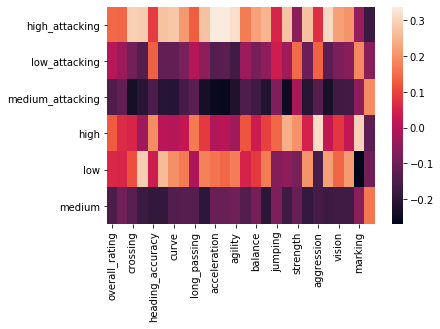

In [0]:
sns.heatmap(df2)

Por los resultados obtenidos por la correlación biserial, se determinó que las variables binarias no se explican fuertemente con las númericas, por lo tanto debemos utilizar estas variables en el modelo

## Trabajo posterior
Dentro del trabajo siguiente se propone utilizar una metodología de envolvente, donde se busque mejorar la precisión de los modelos propuestos

#**Aprendizaje Supervisado**
En Esta sección se pretende utilizar 3 técnicas de aprendizaje supervisado, para realizar la tarea de clasificación del pie preferido de los jugadores, inicialmente probaremos la regresión logistica, random forest y SVM por ser 3 de las técnicas que se úsan con mayor frecuencia para este tipo de problemas y las evaluaremos con las métricas apropiadas para ver cual tiene un mejor desempeño con el dataset que preparamos en la Tarea 1: Ingenieria de características.


##Desarrollo modelos con datos sin balancear

###Importe de librerias y train-test split

In [0]:
#Importamos las librerias necesarias
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [0]:
Y["preferred_foot_bin"].value_counts()

1    100460
0     32456
Name: preferred_foot_bin, dtype: int64

In [0]:
#Convertimos los Dataframe de pandas a numpy arrays
X = X.to_numpy()
Y = Y.to_numpy()
print(X)
print(Y)

[[0.55737705 0.55172414 0.5106383  ... 0.         1.         0.0807155 ]
 [0.47540984 0.46551724 0.5106383  ... 0.         1.         0.0807155 ]
 [0.45901639 0.44827586 0.5        ... 0.         1.         0.07009719]
 ...
 [0.72131148 0.70689655 0.77659574 ... 1.         0.         0.28850865]
 [0.73770492 0.72413793 0.77659574 ... 1.         0.         0.28850865]
 [0.7704918  0.72413793 0.77659574 ... 1.         0.         0.23711754]]
[[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [0]:
Y = Y.ravel()

In [0]:
#Como podemos observar, tenemos un problema típico en las tareas de clasificación y es que nuestras clases están desbalanceadas,
#lo cual muchas veces es indeseable ya que genera un sobre ajuste en el modelo hacia la clase dominante.
#Para lidiar con esto, inicialmente utilizaremos el parametro "Stratify" en el momento de ejecutar la función train_test_split
#Esto nos ayudará a que la proporción de clases en el conjunto de entrenamiento sea equivalente en el conjunto de prueba. 
#Si aún así vemos que está afectando mucho el desempeño de nuestros modelos, deberemos aplicar otras técnas como oversampling o undersampling.
validation_size = 0.35
seed = 5

X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y, test_size=validation_size, random_state=seed)

###Regresión logística

#### Modelo

In [0]:
#Ajustamos nuestro modelo de regresión logistica.
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

####Resultados y métricas

Train Accuracy
0.7652873430175358
Test Accuracy
0.7656327250059113
=== Confusion Matrix ===
[[ 1051 10309]
 [  594 34567]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.64      0.09      0.16     11360
           1       0.77      0.98      0.86     35161

    accuracy                           0.77     46521
   macro avg       0.70      0.54      0.51     46521
weighted avg       0.74      0.77      0.69     46521



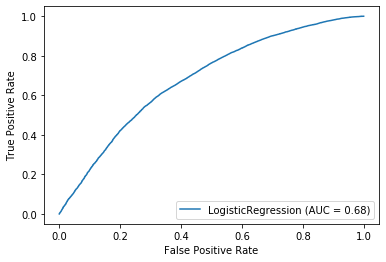

In [0]:
predictions = model.predict(X_test)
print("Train Accuracy")
print(accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, predictions))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
lg_disp = plot_roc_curve(model, X_test, y_test)

### Random Forest

#### Modelo

In [0]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

#### Resultados y métricas

Train Accuracy
0.9991087447190231
Test Accuracy
0.9435093828593538
=== Confusion Matrix ===
[[ 8916  2444]
 [  184 34977]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     11360
           1       0.93      0.99      0.96     35161

    accuracy                           0.94     46521
   macro avg       0.96      0.89      0.92     46521
weighted avg       0.95      0.94      0.94     46521



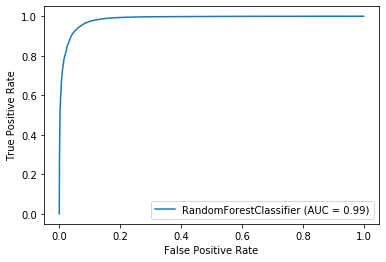

In [0]:
print("Train Accuracy")
print(accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, rfc_predict))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
rfc_disp = plot_roc_curve(rfc, X_test, y_test)

###Support Vector Machine

####Modelo

In [0]:
svclassifier = SVC(random_state=42)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

####Resultados y Métricas

Train Accuracy
0.762393657040338
Test Accuracy
0.7628382880849509
=== Confusion Matrix ===
[[  480 10880]
 [  153 35008]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.04      0.08     11360
           1       0.76      1.00      0.86     35161

    accuracy                           0.76     46521
   macro avg       0.76      0.52      0.47     46521
weighted avg       0.76      0.76      0.67     46521



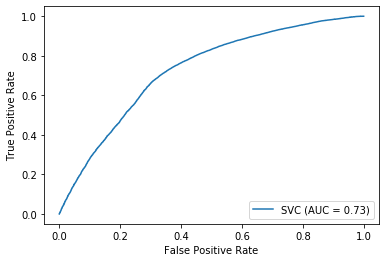

In [0]:
print("Train Accuracy")
print(accuracy_score(y_train, svclassifier.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
lg_disp = plot_roc_curve(svclassifier, X_test, y_test)

##Resultados iniciales:
Como podemos observar claramente en el reporte, el desbalance de clases le está generando problemas a nuestro modelo, ya que la mayoría de predicciones las hace hacia la clase dominante, por lo tanto, para los casos en que la clase es uno las métricas recall y F1 son bastante altas, mientras que para la clase 0, son muy bajas. Continuaremos usando los dos modelos random forest y SVM para ver si obtenemos mejores resultados, sin embargo, si continuamos teniendo este inconveniente, será necesarío utilizar alguna técnica para tratar de solventarlo y mejorar el desempeño de nuestros modelos.
El modelo Random forest presenta un mejor desempeño incluso con el desbalance de clases, tiene un alto recall para la clase 1, y un recall bastante aceptable para la clase 0. Esto se debe a.... Continuaremos con el SVM para comparar los resultados.

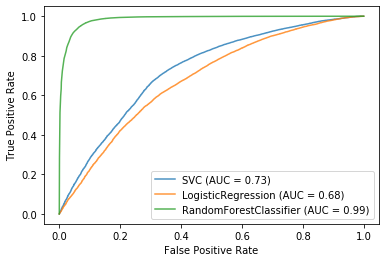

In [0]:
ax = plt.gca()
svc_disp = plot_roc_curve(svclassifier, X_test, y_test, ax=ax, alpha=0.8)
lg_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

###Crossvalidation sobre Random Forest.

In [0]:
rfc_cv_scores = cross_validate(rfc, X, Y, cv=10, scoring=("f1","accuracy","recall","roc_auc"), return_train_score = True)

In [0]:
print(rfc_cv_scores)

{'fit_time': array([33.85446191, 33.95808744, 33.54601216, 33.56166315, 33.54736638,
       33.28270221, 32.88871074, 33.33252358, 33.41950846, 33.16051722]), 'score_time': array([0.60229564, 0.58211994, 0.57814574, 0.576581  , 0.6030004 ,
       0.58541918, 0.58600807, 0.59105778, 0.59453321, 0.58908939]), 'test_f1': array([0.86209628, 0.86352732, 0.86612918, 0.86036808, 0.86188088,
       0.85990125, 0.86281429, 0.85387324, 0.86143014, 0.85922479]), 'train_f1': array([0.99915406, 0.99914858, 0.99914301, 0.99916516, 0.99916515,
       0.99919276, 0.99914303, 0.99913191, 0.99911534, 0.99912647]), 'test_accuracy': array([0.76421908, 0.76888354, 0.7726452 , 0.76083358, 0.76376768,
       0.76090882, 0.76600707, 0.75020691, 0.76307276, 0.7587089 ]), 'train_accuracy': array([0.99872099, 0.99871263, 0.99870427, 0.99873771, 0.99873771,
       0.99877951, 0.99870428, 0.99868757, 0.99866249, 0.99867921]), 'test_recall': array([0.97511447, 0.96744973, 0.97312363, 0.97491539, 0.97521402,
       

In [0]:
print(rfc_cv_scores["test_f1"].mean())
print(rfc_cv_scores["test_recall"].mean())
print(rfc_cv_scores["test_accuracy"].mean())
print(rfc_cv_scores["test_roc_auc"].mean())

0.8611245452640925
0.9724268365518614
0.7629253535633174
0.6638372705507255


##**Aplicando Undersampling**

In [0]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler('majority', random_state=0)
X_resampled, y_resampled = rus.fit_resample(X,Y)
print(y_resampled.size)
y_resampled.ravel()
Counter(y_resampled)

64912


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 32456, 1: 32456})

##Probamos nuevamente los modelos luego de realizar undersampling

In [0]:
validation_size = 0.35
seed = 5

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,stratify=y_resampled, test_size=validation_size, random_state=seed)

In [0]:
#Ajustamos nuestro modelo de regresión logistica.
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Train Accuracy
0.6370638983693592
Test Accuracy
0.6329225352112676
=== Confusion Matrix ===
[[7443 3917]
 [4423 6937]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.63      0.66      0.64     11360
           1       0.64      0.61      0.62     11360

    accuracy                           0.63     22720
   macro avg       0.63      0.63      0.63     22720
weighted avg       0.63      0.63      0.63     22720



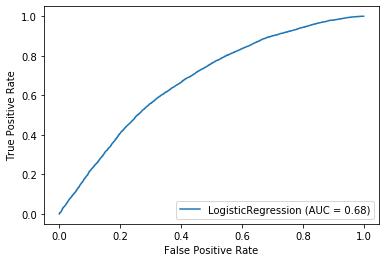

In [0]:
predictions = model.predict(X_test)
print("Train Accuracy")
print(accuracy_score(y_train, model.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, predictions))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, predictions))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, predictions))
lg_disp = plot_roc_curve(model, X_test, y_test)

In [0]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

Train Accuracy
0.9994785741372773
Test Accuracy
0.9095510563380281
=== Confusion Matrix ===
[[10432   928]
 [ 1127 10233]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     11360
           1       0.92      0.90      0.91     11360

    accuracy                           0.91     22720
   macro avg       0.91      0.91      0.91     22720
weighted avg       0.91      0.91      0.91     22720



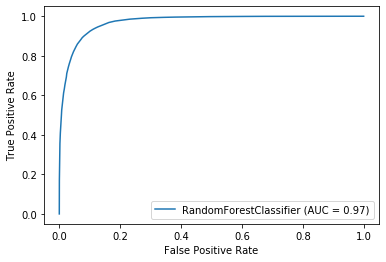

In [0]:
print("Train Accuracy")
print(accuracy_score(y_train, rfc.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, rfc_predict))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
rfc_disp = plot_roc_curve(rfc, X_test, y_test)

In [0]:
svclassifier = SVC(random_state=42)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

Train Accuracy
0.6751753886992795
Test Accuracy
0.663468309859155
=== Confusion Matrix ===
[[7523 3837]
 [3809 7551]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      0.66      0.66     11360
           1       0.66      0.66      0.66     11360

    accuracy                           0.66     22720
   macro avg       0.66      0.66      0.66     22720
weighted avg       0.66      0.66      0.66     22720



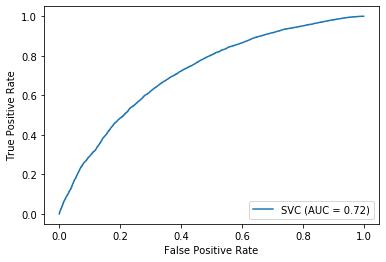

In [0]:
print("Train Accuracy")
print(accuracy_score(y_train, svclassifier.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, y_pred))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
lg_disp = plot_roc_curve(svclassifier, X_test, y_test)

In [0]:
ax = plt.gca()
svc_disp = plot_roc_curve(svclassifier, X_test, y_test, ax=ax, alpha=0.8)
lg_disp.plot(ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [0]:
rfc_cv_scores_resampled = cross_validate(rfc, X_resampled, y_resampled, cv=10, scoring=("f1","accuracy","recall","roc_auc"), return_train_score = True)

In [0]:
print(rfc_cv_scores_resampled)

{'fit_time': array([16.09783316, 16.06015396, 16.15727115, 16.02412653, 15.95369124,
       16.03784037, 16.05234408, 15.97433138, 16.1760273 , 16.04281116]), 'score_time': array([0.33224297, 0.34335041, 0.34337282, 0.34755468, 0.33928967,
       0.33820677, 0.33612585, 0.34580255, 0.33396029, 0.34754348]), 'test_f1': array([0.75191689, 0.75300761, 0.75264844, 0.73672754, 0.72742575,
       0.7354325 , 0.72809957, 0.73002263, 0.73525872, 0.72894737]), 'train_f1': array([0.99934949, 0.99934936, 0.99929813, 0.9992981 , 0.99928104,
       0.99926384, 0.99931512, 0.99933225, 0.99924676, 0.99936647]), 'test_accuracy': array([0.69100431, 0.6900801 , 0.69064859, 0.66461254, 0.65074719,
       0.66214759, 0.64997689, 0.65074719, 0.66106917, 0.65090125]), 'train_accuracy': array([0.99934954, 0.99934954, 0.9992982 , 0.9992982 , 0.99928108,
       0.99926396, 0.99931531, 0.99933243, 0.99924685, 0.99936667]), 'test_recall': array([0.93653728, 0.94485521, 0.94144838, 0.93867488, 0.93220339,
       

In [0]:
print(rfc_cv_scores_resampled["test_f1"].mean())
print(rfc_cv_scores_resampled["test_recall"].mean())
print(rfc_cv_scores_resampled["test_accuracy"].mean())
print(rfc_cv_scores_resampled["test_roc_auc"].mean())

0.7379487021184779
0.9394254965457071
0.6661934819841074
0.8392848854277343


##Conclusiones luego de aplicar undersampling

##Weighted Random Forest

In [0]:
validation_size = 0.35
seed = 5

X_train, X_test, y_train, y_test = train_test_split(X,Y,stratify=Y, test_size=validation_size, random_state=seed)

In [0]:
WRF = RandomForestClassifier(class_weight="balanced_subsample")
WRF.fit(X_train,y_train)
WRF_predict = WRF.predict(X_test)

Train Accuracy
0.9991087447190231
Test Accuracy
0.9411018679736033
=== Confusion Matrix ===
[[ 8793  2567]
 [  173 34988]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     11360
           1       0.93      1.00      0.96     35161

    accuracy                           0.94     46521
   macro avg       0.96      0.88      0.91     46521
weighted avg       0.94      0.94      0.94     46521



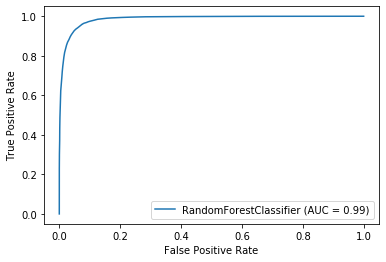

In [0]:
print("Train Accuracy")
print(accuracy_score(y_train, WRF.predict(X_train)))
print("Test Accuracy")
print(accuracy_score(y_test, WRF_predict))
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, WRF_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, WRF_predict))
WRF_disp = plot_roc_curve(WRF, X_test, y_test)

In [0]:
WRF_cv_scores = cross_validate(WRF, X, Y, cv=10, scoring=("f1","accuracy","recall","roc_auc"), return_train_score = True)

In [0]:
print(WRF_cv_scores)

{'fit_time': array([35.28648996, 34.83934569, 35.34472585, 35.48913217, 34.96614361,
       35.1139164 , 35.2194252 , 35.18469119, 35.36440134, 34.99427199]), 'score_time': array([0.56973648, 0.57719016, 0.56071615, 0.57560158, 0.5806222 ,
       0.57228136, 0.56380892, 0.57839608, 0.57705688, 0.57543397]), 'test_f1': array([0.86316895, 0.86472383, 0.86626729, 0.8616784 , 0.86020846,
       0.85839659, 0.86193785, 0.85822785, 0.85965834, 0.86261507]), 'train_f1': array([0.99915327, 0.99914772, 0.99914217, 0.99916435, 0.99916434,
       0.99918647, 0.99914223, 0.99912557, 0.99911444, 0.9991256 ]), 'test_accuracy': array([0.76474571, 0.76986157, 0.77159193, 0.76203732, 0.75985555,
       0.75722239, 0.76232037, 0.75562411, 0.75893462, 0.76307276]), 'train_accuracy': array([0.99872099, 0.99871263, 0.99870427, 0.99873771, 0.99873771,
       0.99877115, 0.99870428, 0.99867921, 0.99866249, 0.99867921]), 'test_recall': array([0.98178379, 0.97322317, 0.97879753, 0.98068883, 0.97760303,
       

In [0]:
print(WRF_cv_scores["test_f1"].mean())
print(WRF_cv_scores["test_recall"].mean())
print(WRF_cv_scores["test_accuracy"].mean())
print(WRF_cv_scores["test_roc_auc"].mean())

0.861688264102906
0.9786780808281904
0.7625266321986692
0.6656770409584114
